In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from src import jpas_sdss
from astropy.coordinates import SkyCoord
from astropy import units as u

# Load JPAS

In [2]:
df_jpas = pd.read_csv('./data/merged3.csv')

In [3]:
df_jpas.ALPHA_J2000.min(), df_jpas.ALPHA_J2000.max(), df_jpas.DELTA_J2000.min(), df_jpas.DELTA_J2000.max()

(213.168920552, 215.98586814, 51.8180267143, 53.5396054378)

In [4]:
cond_spec = df_jpas['specObjID'] > 0
jpas_spec = df_jpas[cond_spec]
# jpas_spec['specObjID'].to_csv('../data/specObjID.csv', index=False)
jpas_spec.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specObjID', 'jpas_idx', 'sep2d', 'sdss_idx', 'TILE_ID', 'NUMBER',
       'ALPHA_J2000', 'DELTA_J2000', 'hpix11', 'X_IMAGE', 'Y_IMAGE', 'R_EFF',
       'FWHM_WORLD', 'A_WORLD', 'B_WORLD', 'THETA_J2000', 'ISOAREA_WORLD',
       'RELERRA_WORLD', 'RELERRB_WORLD', 'ERRTHETA_J2000', 'CLASS_STAR',
       'FLUX_AUTO', 'FLUX_ISO', 'FLUX_PETRO', 'FLUX_MAX_ARCSEC2',
       'PETRO_RADIUS', 'KRON_RADIUS', 'FLUX_APER_0_8', 'FLUX_APER_1_0',
       'FLUX_APER_1_2', 'FLUX_APER_1_5', 'FLUX_APER_2_0', 'FLUX_APER_3_0',
       'FLUX_APER_4_0', 'FLUX_APER_6_0', 'FLUX_RELERR_AUTO', 'FLUX_RELERR_ISO',
       'FLUX_RELERR_PETRO', 'FLUX_RELERR_APER_0_8', 'FLUX_RELERR_APER_1_0',
       'FLUX_RELERR_APER_1_2', 'FLUX_RELERR_APER_1_5', 'FLUX_RELERR_APER_2_0',
       'FLUX_RELERR_APER_3_0', 'FLUX_RELERR_APER_4_0', 'FLUX_RELERR_APER_6_0',
       'FLAGS', 'NORM_WMAP_VAL', 'MASK_FLAGS', 'SINGLE_DETECT',
       'FLUX_ISO_WORSTPSF', '

# Load SDSS

In [5]:
df = pd.read_csv('./data/sdss_info.csv', comment='#')
cond_spec = df['specObjID'] > 0
df_spec = df[cond_spec]
df_spec


,specObjID,class,subClass,z,zErr,survey,sourceType
0,1176654783688239104,GALAXY,NaN,0.085318,0.000036,sdss,GALAXY
1,1176664954170796032,GALAXY,STARFORMING,0.075568,0.000010,sdss,GALAXY
2,1176666603438237696,STAR,F5,-0.000528,0.000020,sdss,GALAXY
3,1176667153194051584,GALAXY,NaN,0.236781,0.000061,sdss,GALAXY
4,1176668252705679360,GALAXY,STARFORMING,0.073042,0.000010,sdss,GALAXY
...,...,...,...,...,...,...,...
929,8263245356365797376,QSO,BROADLINE,1.248047,0.000734,boss,RM_TILE2
930,8263246160665532416,QSO,NaN,1.698755,0.001122,boss,RM_TILE2
931,8263246436382300160,QSO,STARFORMING BROADLINE,0.511455,0.000039,boss,RM_TILE1
932,8263247005633239040,QSO,BROADLINE,1.572382,0.000811,boss,RM_TILE2


In [4]:
df_spec.value_counts('class')

class
GALAXY    514
STAR      238
QSO       182
Name: count, dtype: int64

In [5]:
df_spec.value_counts(['class', 'subClass'])

class   subClass         
QSO     BROADLINE            107
STAR    M5III (221615)        34
GALAXY  STARBURST             32
        STARFORMING           30
STAR    M4.5:III (123657)     24
                            ... 
        A8V (155514)           1
        G9IV (100030)          1
        K0IV (191026)          1
        K1IVa (142091)         1
        sdF3 (140283)          1
Name: count, Length: 67, dtype: int64

# Merge

In [7]:
df_merged = pd.merge(jpas_spec, df_spec, on='specObjID', how='inner')
# df_merged


In [39]:
cond = (df_merged['class'] == 'QSO') # & (df_merged['subClass'] == 'BROADLINE')
df_qso = df_merged[cond]
df_qso

,objid,ra,dec,u,g,r,i,z_x,run,camcol,...,FLUX_PSFCOR,FLUX_RELERR_PSFCOR,FLUX_APER3_WORSTPSF,FLUX_RELERR_APER3_WORSTPSF,class,subClass,z_y,zErr,survey,sourceType
0,1237659120396075265,213.349805,52.063320,22.39950,21.84116,21.48263,21.25299,20.81412,3177,5,...,31.7886848 12.9435368 40.312439 8.34628487 53....,0.372803 2.535156 0.195679 0.836426 0.382324 0...,35.2775574 40.0073471 38.5966949 33.6596642 33...,0.368896 0.768555 0.213867 0.359375 0.67041 0....,QSO,NaN,0.825490,0.000283,boss,QSO_EBOSS_W3_ADM
4,1237659120396140736,213.571361,51.956279,20.99424,20.47704,20.43086,20.23825,20.14130,3177,5,...,123.669014 89.6180267 82.678894 46.2377052 96....,0.108215 0.338867 0.111389 0.202148 0.229614 0...,109.173309 87.891861 74.149498 51.4268379 71.2...,0.107483 0.344727 0.116882 0.215698 0.293945 0...,QSO,BROADLINE,0.603873,0.000054,boss,RM_TILE1
14,1237659120396075137,213.541066,52.027018,20.03336,19.93775,19.95577,19.62774,19.64699,3177,5,...,344.617279 358.575531 300.170074 187.879089 36...,0.052063 0.0979 0.033264 0.047424 0.061218 0.0...,354.186401 384.944397 313.553986 300.310059 33...,0.048065 0.081665 0.030548 0.042633 0.065857 0...,QSO,BROADLINE,1.743377,0.000292,boss,RM_TILE2
23,1237659120933012060,213.986999,52.268662,22.16433,21.95655,21.48251,21.26206,21.29520,3177,6,...,147.840134 144.170959 115.083122 53.9966774 56...,0.086426 0.224243 0.073242 0.138794 0.356934 0...,149.639191 104.014557 106.049347 82.3061829 89...,0.083801 0.2854 0.079834 0.141479 0.23645 0.26...,QSO,NaN,1.392286,0.001380,boss,QSO_EBOSS_W3_ADM
25,1237659120396075549,213.578777,52.068333,22.55456,22.22909,21.47172,20.95501,20.54313,3177,5,...,20.7516289 71.040451 36.4035301 16.4608593 23....,0.585449 0.436523 0.213135 0.447754 0.865723 0...,32.0699348 64.009201 33.5370064 20.2034321 33....,0.377197 0.487061 0.243896 0.570801 0.644043 5...,QSO,STARBURST,0.286767,0.000061,boss,QSO_EBOSS_W3_ADM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1237661417139405061,215.099504,53.268073,20.76871,20.39384,20.24555,20.09821,19.85997,3712,3,...,333.273895 291.213898 300.426575 245.863312 28...,0.066589 0.089355 0.04068 0.071777 0.05368 0.1...,311.174835 269.772552 269.478119 236.999039 26...,0.064148 0.09198 0.036499 0.06604 0.048492 0.1...,QSO,BROADLINE,0.734082,0.000189,boss,RM_TILE1
919,1237661417139470406,215.135962,53.273422,19.77532,19.36974,19.27914,19.35146,19.38924,3712,3,...,650.614929 673.724609 695.504272 597.15625 548...,0.033203 0.039642 0.017532 0.03006 0.025726 0....,744.102356 756.52002 705.64325 697.093262 617....,0.0298 0.036469 0.016769 0.025986 0.023727 0.0...,QSO,NaN,3.214552,0.001932,boss,QSO_EBOSS_W3_ADM
920,1237661417139470521,215.203598,53.357842,21.97353,21.61929,21.23017,20.85943,21.13650,3712,3,...,52.7589417 10.1458454 43.9452667 18.9534626 28...,0.292236 1.9375 0.154297 0.629883 0.433838 0.3...,66.4262009 22.1633587 36.7185097 53.8712502 36...,0.269043 1.085938 0.233154 0.266602 0.419678 0...,QSO,NaN,1.787706,0.001488,boss,QSO_EBOSS_W3_ADM
921,1237661417139470525,215.106592,53.184793,21.74799,21.68454,21.64227,21.40104,21.84530,3712,3,...,72.5980377 57.4818916 47.9736099 0.0 22.490501...,0.26709 0.370605 0.170044 0.0 0.463867 0.48461...,39.4247818 40.6532288 47.2928619 14.1475077 36...,0.544434 0.60498 0.177856 1.050781 0.306885 0....,QSO,BROADLINE,1.851466,0.000778,boss,RM_TILE2


Loading 25943_8264186519914567680.fits


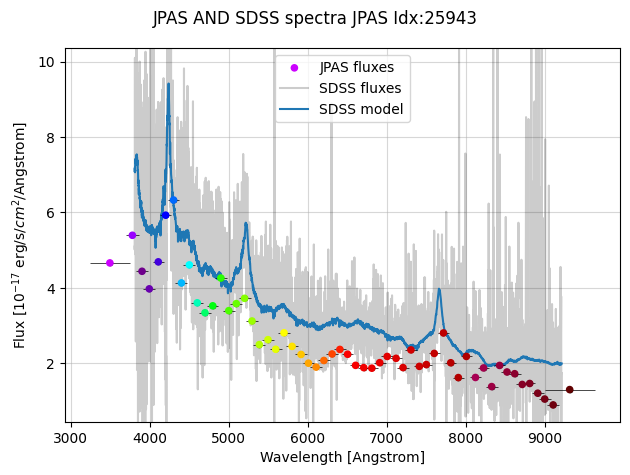

Redshift: 1.743377
Loading 19880_8264374261525010432.fits


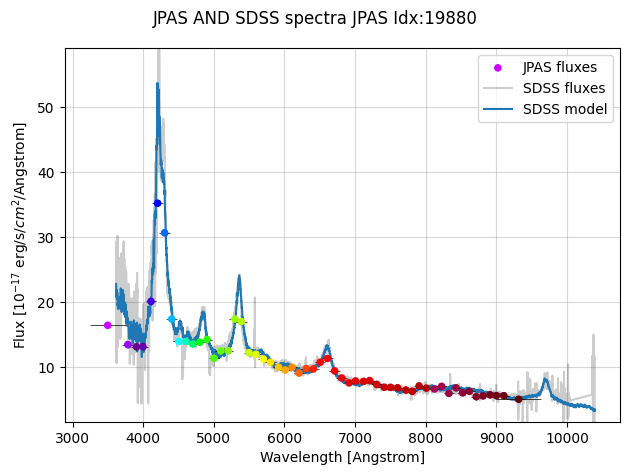

Redshift: 2.46264
Loading 35490_8263046325719029760.fits


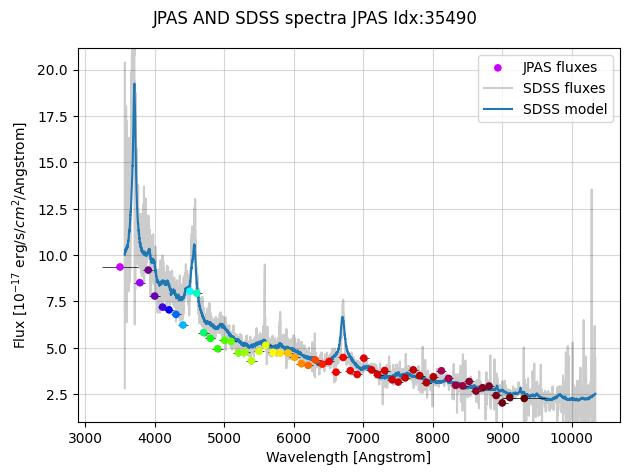

Redshift: 1.393938
Loading 47987_8264177174065731584.fits


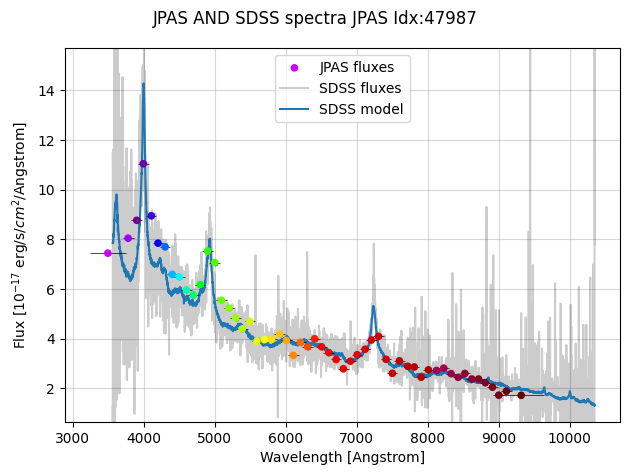

Redshift: 1.584336
Loading 41256_8261922647115585536.fits


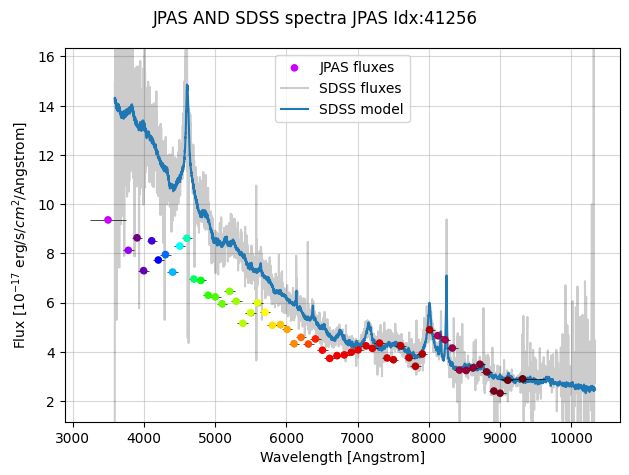

Redshift: 0.646646


In [69]:
idx = 0
couunt = 0
while couunt < 5:
    row = df_qso.iloc[idx]
    r_mag = row['r']
    if r_mag < 20:
        jpas_sdss.plot_jpas_spec(row)
        print(f"Redshift: {row['z_y']}")
        couunt += 1
    idx += 1


# Load photo redshift

In [30]:
df_Lephare_PhotoZ = pd.read_csv('./data/Lephare_PhotoZ.csv', comment='#')
df_Lephare_PhotoZ

,TILE_ID,NUMBER,PHOTOZ,PHOTOZ_ERR,Z_CUMULATIVE_PDF,Z_ML,Z_BEST68_HIGH,Z_BEST68_LOW,CHI_BEST,ODDS
0,2406,37,0.000,0.57215,0.0130000003 0.351926237 0.46658358 0.54669892...,0.9983,1.1443,0.0000,3.808230,0.000038
1,2406,38,1.216,0.09320,0.0270000007 1.04429996 1.05442095 1.06470382 ...,1.1337,1.2226,1.0362,161.942993,0.385769
2,2406,40,1.086,0.03785,0.0149999997 1.03963971 1.0476743 1.05922186 1...,1.0994,1.1117,1.0360,134.257996,0.581709
3,2406,41,0.348,0.11660,0.0189999994 0.281796366 0.32177341 0.34020820...,0.4656,0.5450,0.3118,81.358101,0.227244
4,2406,43,0.818,0.57855,0.0170000009 0.401621789 0.512216628 0.5881359...,0.8418,1.1571,0.0000,5.470090,0.145450
...,...,...,...,...,...,...,...,...,...,...
40444,2243,15940,0.942,0.09355,0.0390000008 0.672204494 0.721061707 0.7544083...,0.9353,0.9936,0.8065,17.094000,0.357377
40445,2243,15941,0.000,0.66350,0.0130000003 0.401942551 0.517591119 0.6107947...,1.0070,1.3270,0.0000,11.320300,0.000034
40446,2243,15942,0.142,0.00630,0.0209999997 0.108413197 0.118124925 0.1228153...,0.1368,0.1465,0.1339,59.884899,0.955018
40447,2243,15943,0.444,0.05215,0.0189999994 0.306673855 0.336245805 0.3520056...,0.4165,0.4673,0.3630,18.880199,0.419925


In [36]:
df_qso.columns, df_Lephare_PhotoZ.columns

(Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z_x', 'run', 'camcol',
        'field', 'specObjID', 'jpas_idx', 'sep2d', 'sdss_idx', 'TILE_ID',
        'NUMBER', 'ALPHA_J2000', 'DELTA_J2000', 'hpix11', 'X_IMAGE', 'Y_IMAGE',
        'R_EFF', 'FWHM_WORLD', 'A_WORLD', 'B_WORLD', 'THETA_J2000',
        'ISOAREA_WORLD', 'RELERRA_WORLD', 'RELERRB_WORLD', 'ERRTHETA_J2000',
        'CLASS_STAR', 'FLUX_AUTO', 'FLUX_ISO', 'FLUX_PETRO', 'FLUX_MAX_ARCSEC2',
        'PETRO_RADIUS', 'KRON_RADIUS', 'FLUX_APER_0_8', 'FLUX_APER_1_0',
        'FLUX_APER_1_2', 'FLUX_APER_1_5', 'FLUX_APER_2_0', 'FLUX_APER_3_0',
        'FLUX_APER_4_0', 'FLUX_APER_6_0', 'FLUX_RELERR_AUTO', 'FLUX_RELERR_ISO',
        'FLUX_RELERR_PETRO', 'FLUX_RELERR_APER_0_8', 'FLUX_RELERR_APER_1_0',
        'FLUX_RELERR_APER_1_2', 'FLUX_RELERR_APER_1_5', 'FLUX_RELERR_APER_2_0',
        'FLUX_RELERR_APER_3_0', 'FLUX_RELERR_APER_4_0', 'FLUX_RELERR_APER_6_0',
        'FLAGS', 'NORM_WMAP_VAL', 'MASK_FLAGS', 'SINGLE_DETECT',
        'FLUX_

In [41]:
df = pd.merge(df_qso, df_Lephare_PhotoZ, on=['TILE_ID', 'NUMBER'], how='inner')
df

,objid,ra,dec,u,g,r,i,z_x,run,camcol,...,survey,sourceType,PHOTOZ,PHOTOZ_ERR,Z_CUMULATIVE_PDF,Z_ML,Z_BEST68_HIGH,Z_BEST68_LOW,CHI_BEST,ODDS
0,1237659120396075265,213.349805,52.063320,22.39950,21.84116,21.48263,21.25299,20.81412,3177,5,...,boss,QSO_EBOSS_W3_ADM,0.660,0.16515,0.0149999997 0.129811198 0.171444938 0.4817719...,0.6814,0.9846,0.6543,30.244101,0.275694
1,1237659120396140736,213.571361,51.956279,20.99424,20.47704,20.43086,20.23825,20.14130,3177,5,...,boss,RM_TILE1,0.904,0.01130,0.254999995 0.842597127 0.859719872 0.88332712...,0.9014,0.9130,0.8904,121.902000,0.870148
2,1237659120396075137,213.541066,52.027018,20.03336,19.93775,19.95577,19.62774,19.64699,3177,5,...,boss,RM_TILE2,1.500,0.00030,0.0130000003 0.0522048734 1.49329829 1.4971768...,1.4985,1.5000,1.4994,489.002991,0.898860
3,1237659120933012060,213.986999,52.268662,22.16433,21.95655,21.48251,21.26206,21.29520,3177,6,...,boss,QSO_EBOSS_W3_ADM,0.604,0.00395,0.144999996 0.593732357 0.595710993 0.59666568...,0.6006,0.6049,0.5970,79.494202,0.993010
4,1237659120396075549,213.578777,52.068333,22.55456,22.22909,21.47172,20.95501,20.54313,3177,5,...,boss,QSO_EBOSS_W3_ADM,0.284,0.00235,0.0810000002 0.276776671 0.279484361 0.2803852...,0.2836,0.2857,0.2810,30.664600,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1237661417139404981,215.181995,53.368431,19.69112,19.34077,19.26306,19.01319,18.94835,3712,3,...,boss,RM_TILE2,1.500,0.00030,0.490999997 1.49702764 1.49767649 1.49832547 1...,1.4987,1.5000,1.4994,554.653992,1.000000
177,1237661417139470406,215.135962,53.273422,19.77532,19.36974,19.27914,19.35146,19.38924,3712,3,...,boss,QSO_EBOSS_W3_ADM,1.500,0.00075,0.497000009 1.49231112 1.49423194 1.49542594 1...,1.4979,1.5000,1.4985,1319.579960,1.000000
178,1237661417139470521,215.203598,53.357842,21.97353,21.61929,21.23017,20.85943,21.13650,3712,3,...,boss,QSO_EBOSS_W3_ADM,0.156,0.00500,0.0209999997 0.153134257 0.155697376 0.1568350...,0.1627,0.1653,0.1553,40.885399,0.628608
179,1237661417139470525,215.106592,53.184793,21.74799,21.68454,21.64227,21.40104,21.84530,3712,3,...,boss,RM_TILE2,1.416,0.35210,0.00300000003 0.75184691 0.806083798 0.8472714...,1.4234,1.5000,0.7958,40.875301,0.351617


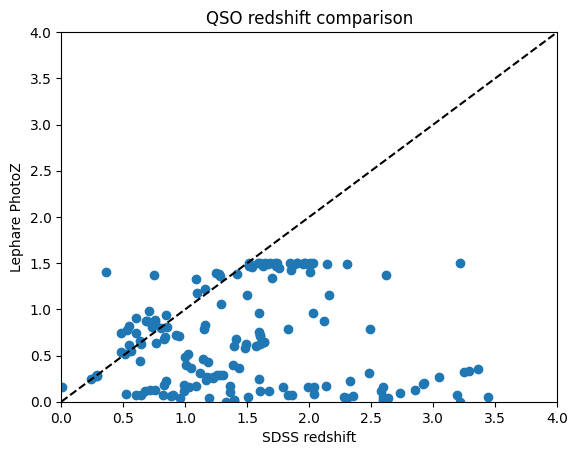

In [44]:
plt.scatter(df['z_y'], df['Z_ML'])
plt.xlabel('SDSS redshift')
plt.ylabel('Lephare PhotoZ')
plt.plot([0, 4], [0, 4], 'k--')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.title('QSO redshift comparison')
plt.show()

# Load GAIA QSO candidates

In [ ]:
query = """select
q.source_id, q.redshift_qsoc, q.qso_variability, q.zscore_qsoc,
g.ra, g.dec, g.pm, 	g.phot_g_mean_mag, g.bp_rp
from gaiadr3.qso_candidates as q
join gaiadr3.gaia_source as g on q.source_id=g.source_id
where 
g.ra >= 213.168920552 and g.ra <= 215.98586814
and g.dec >= 51.8180267143 and g.dec <= 53.5396054378"""

In [47]:
df_gaia = pd.read_csv('./data/gaia_qso.csv', comment='#')
df_gaia

,source_id,redshift_qsoc,qso_variability,zscore_qsoc,ra,dec,pm,phot_g_mean_mag,bp_rp
0,1608091177880904320,4.388089,NaN,0.988158,213.185646,52.481056,1.402065,20.457397,0.500807
1,1608092552270481664,2.415113,NaN,0.407450,213.195560,52.559772,2.638473,20.773850,0.219269
2,1512007227551498752,0.188217,NaN,0.730529,213.195591,52.200644,1.330496,20.853690,1.000469
3,1608090971722476032,4.033927,NaN,0.434556,213.199734,52.485109,4.828355,20.611185,0.170546
4,1512007266207682176,1.510783,-0.470999,0.905852,213.200779,52.212115,0.228204,19.520796,0.540663
...,...,...,...,...,...,...,...,...,...
423,1604956234007918208,2.674262,NaN,0.988129,215.941175,52.413728,3.591650,20.680084,0.380285
424,1604910084582937472,2.255216,NaN,0.856061,215.948221,51.945010,4.126080,20.912130,0.534906
425,1604967705864787712,1.778923,NaN,0.947758,215.957157,52.650982,0.551064,20.023312,0.617256
426,1604910703058238848,0.550334,NaN,0.608648,215.957460,51.975084,1.948279,20.410612,0.646725


In [56]:
coord_jpas = SkyCoord(ra=df_jpas['ALPHA_J2000'], dec=df_jpas['DELTA_J2000'], unit=(u.deg, u.deg))
coord_gaia = SkyCoord(ra=df_gaia['ra'], dec=df_gaia['dec'], unit=(u.deg, u.deg))
idx, d2d, _ = coord_gaia.match_to_catalog_sky(coord_jpas)

df_gaia['idx'] = idx
df_gaia['d2d'] = d2d.arcsec
df_gaia

,source_id,redshift_qsoc,qso_variability,zscore_qsoc,ra,dec,pm,phot_g_mean_mag,bp_rp,idx,d2d
0,1608091177880904320,4.388089,NaN,0.988158,213.185646,52.481056,1.402065,20.457397,0.500807,4552,761.074604
1,1608092552270481664,2.415113,NaN,0.407450,213.195560,52.559772,2.638473,20.773850,0.219269,323,943.008587
2,1512007227551498752,0.188217,NaN,0.730529,213.195591,52.200644,1.330496,20.853690,1.000469,2410,87.595917
3,1608090971722476032,4.033927,NaN,0.434556,213.199734,52.485109,4.828355,20.611185,0.170546,4552,751.689357
4,1512007266207682176,1.510783,-0.470999,0.905852,213.200779,52.212115,0.228204,19.520796,0.540663,2410,93.324153
...,...,...,...,...,...,...,...,...,...,...,...
423,1604956234007918208,2.674262,NaN,0.988129,215.941175,52.413728,3.591650,20.680084,0.380285,6648,1916.307669
424,1604910084582937472,2.255216,NaN,0.856061,215.948221,51.945010,4.126080,20.912130,0.534906,6404,3096.502109
425,1604967705864787712,1.778923,NaN,0.947758,215.957157,52.650982,0.551064,20.023312,0.617256,5024,1328.581703
426,1604910703058238848,0.550334,NaN,0.608648,215.957460,51.975084,1.948279,20.410612,0.646725,9290,3036.859917


In [58]:
df_gaia_jpas = pd.merge(df_gaia, df_jpas, left_on='idx', right_index=True)
df_gaia_jpas

,source_id,redshift_qsoc,qso_variability,zscore_qsoc,ra_x,dec_x,pm,phot_g_mean_mag,bp_rp,idx,...,FLAGS,NORM_WMAP_VAL,MASK_FLAGS,SINGLE_DETECT,FLUX_ISO_WORSTPSF,FLUX_RELERR_ISO_WORSTPSF,FLUX_PSFCOR,FLUX_RELERR_PSFCOR,FLUX_APER3_WORSTPSF,FLUX_RELERR_APER3_WORSTPSF
0,1608091177880904320,4.388089,NaN,0.988158,213.185646,52.481056,1.402065,20.457397,0.500807,4552,...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.0 0.949158788 0.0 0.0 0.0 0.188501343 0.0 0....,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 781 0 0 0 0 0 0 958 0 ...,0.00196768087 118.455765 -0.00099230255 -0.061...,65504.0 0.175049 -65504.0 -65504.0 65504.0 0.2...,5.71670532 76.8595123 3.77481437 2.75336933 1....,0.033569 0.4021 0.032928 0.031647 0.033264 0.4...,11.2956858 105.502815 8.36825848 8.21256828 5....,0.0 0.281006 0.0 0.0 0.0 0.359619 0.0 0.0 0.0 ...
1,1608092552270481664,2.415113,NaN,0.407450,213.195560,52.559772,2.638473,20.773850,0.219269,323,...,1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 ...,0.0 0.918307722 0.270347416 0.0 0.0 0.18699131...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0 0 0 0 0 0 0 0 0 1409 0 0 605 0 0 0 1398 0 0 ...,-0.00342191872 27.756031 38.8224297 -0.0039907...,-65504.0 0.429199 0.233398 -65504.0 65504.0 0....,3.8568809 21.3016777 50.4396706 2.24400234 1.3...,0.073853 1.416992 0.291992 0.069153 0.073059 0...,9.51602268 35.2025719 47.3842926 7.84881639 3....,0.0 0.875488 0.32251 0.0 0.0 0.368896 0.0 0.0 ...
2,1512007227551498752,0.188217,NaN,0.730529,213.195591,52.200644,1.330496,20.853690,1.000469,2410,...,2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...,0.511051059 0.887582958 0.314851344 0.92562085...,1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 ...,0 0 0 0 0 0 0 1937 0 0 0 0 0 2125 2311 0 0 154...,78.6075516 74.3617477 74.6760406 85.8529587 64...,0.199829 0.407959 0.18103 0.155884 0.266846 0....,70.2425308 32.2586823 35.4643593 52.011837 55....,0.288818 1.105469 0.567383 0.231689 0.490479 0...,56.3170624 18.1918755 43.2391243 51.5020752 38...,0.286377 1.719727 0.36792 0.222656 0.557617 0....
3,1608090971722476032,4.033927,NaN,0.434556,213.199734,52.485109,4.828355,20.611185,0.170546,4552,...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.0 0.949158788 0.0 0.0 0.0 0.188501343 0.0 0....,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 781 0 0 0 0 0 0 958 0 ...,0.00196768087 118.455765 -0.00099230255 -0.061...,65504.0 0.175049 -65504.0 -65504.0 65504.0 0.2...,5.71670532 76.8595123 3.77481437 2.75336933 1....,0.033569 0.4021 0.032928 0.031647 0.033264 0.4...,11.2956858 105.502815 8.36825848 8.21256828 5....,0.0 0.281006 0.0 0.0 0.0 0.359619 0.0 0.0 0.0 ...
4,1512007266207682176,1.510783,-0.470999,0.905852,213.200779,52.212115,0.228204,19.520796,0.540663,2410,...,2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...,0.511051059 0.887582958 0.314851344 0.92562085...,1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 ...,0 0 0 0 0 0 0 1937 0 0 0 0 0 2125 2311 0 0 154...,78.6075516 74.3617477 74.6760406 85.8529587 64...,0.199829 0.407959 0.18103 0.155884 0.266846 0....,70.2425308 32.2586823 35.4643593 52.011837 55....,0.288818 1.105469 0.567383 0.231689 0.490479 0...,56.3170624 18.1918755 43.2391243 51.5020752 38...,0.286377 1.719727 0.36792 0.222656 0.557617 0....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1604956234007918208,2.674262,NaN,0.988129,215.941175,52.413728,3.591650,20.680084,0.380285,6648,...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.498703808 0.476431847 0.751761496 0.0 0.9660...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2294 0 0 0...,13.6693697 1.14083433 0.0586705878 -0.86744499...,0.258057 6.851562 14.210938 -65504.0 0.393799 ...,35.735527 0.0 0.0 1.87157953 15.9748611 0.0 1....,0.498291 0.0 0.0 0.068359 0.479004 0.0 14.9921...,36.7802887 58.6897392 -0.527983427 -3.57265496...,0.703125 0.59082 -18.984375 -7.070312 1.272461...
424,1604910084582937472,2.2552

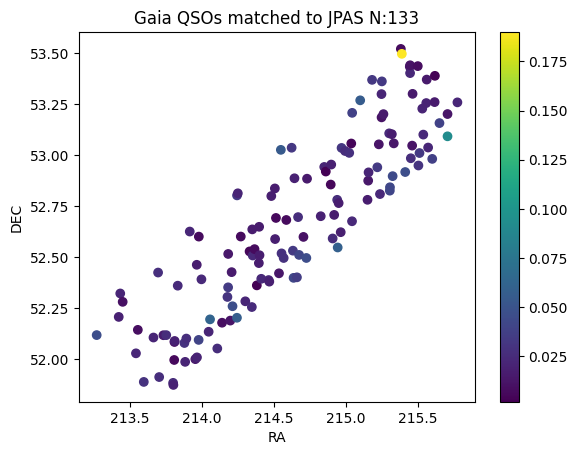

In [67]:
cond = df_gaia_jpas['d2d'] < 2

plt.scatter(df_gaia_jpas.loc[cond, 'ra_x'], df_gaia_jpas.loc[cond, 'dec_x'], c=df_gaia_jpas.loc[cond, 'd2d'])
plt.colorbar()
plt.title(f'Gaia QSOs matched to JPAS N:{len(df_gaia_jpas[cond])}')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()